# Sales Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

#### Merging 12 months of sales data into a single file

In [2]:
import glob
import os

In [3]:
# merging the files in Sales_Data directory

joined_files = os.path.join("./Sales_Data", "Sales_*.csv")


In [4]:
# A list of all joined files is returned
joined_list = glob.glob(joined_files)


In [5]:
# Finally, the files are joined

df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [7]:
df.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [8]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


### Clean up the data

#### Drop Nan rows

In [9]:
all_data.columns


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [10]:
nan_df = all_data[all_data.isna().any(axis=1)]

In [11]:
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1047,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
all_data.dropna(how='all',  inplace=True)

In [13]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [15]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Find 'Or' and delete it

In [16]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']

temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
433,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
864,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
930,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1979,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2032,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### convert columns to the correct type

In [18]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make float

In [19]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Augument data with additional columns

#### Add Month Column

In [20]:
all_data["Month"] = all_data['Order Date'].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


In [22]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

#### Add a sales column

In [23]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99


#### Add a city column

In [24]:
## method 1
  ##  all_data['Column'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

## method 2    
def get_city(address):
    return address.split(',')[1]

def get_address(address):
    return address.split(',')[2].split(' ')[1]

all_data['Column'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_address(x)})")
all_data.rename(columns={'Column':'City'}, inplace=True)

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA)


#### Best Month For Sales And How Much Was Earned That Month

In [25]:
results = all_data.groupby('Month').sum()

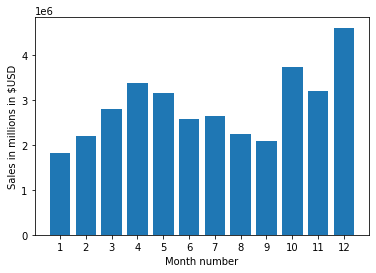

In [26]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in millions in $USD')
plt.xlabel('Month number')
plt.show()

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA)


In [44]:
city_results = all_data.groupby('City').sum()

city_results

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264,442932
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946,289060
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225,590442
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390,435155
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444,866638
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,357696,733598
Portland (ME),2750,4.471893e+05,17144,4.497583e+05,35211,72856
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,144421,295533
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,643265,1319477


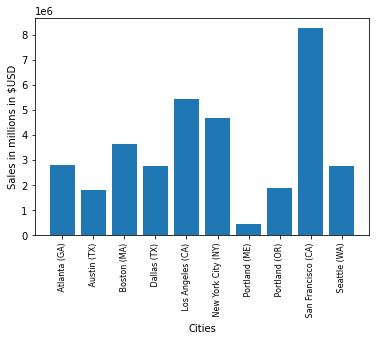

In [41]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, city_results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in millions in $USD')
plt.xlabel('Cities')
plt.show()

#### Time to display advertisements to maximize likelihood of customer's buying product

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA)


In [31]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA)


In [47]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX),20,59,1
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX),20,59,1
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX),20,59,1
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA),5,39,1
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA),0,1,1


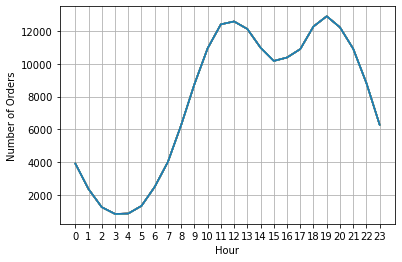

In [52]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# adverts recomended at 11 am or at 7 pm

#### What products are most often sold together ?

In [53]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [55]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX),20,59,1
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX),20,59,1
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX),20,59,1
30,162037,iPhone,1,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles (CA),2,11,1
31,162037,Lightning Charging Cable,1,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",3,14.95,Los Angeles (CA),2,11,1
60,162066,AA Batteries (4-pack),1,3.84,2019-03-13 13:57:00,"602 Pine St, New York City, NY 10001",3,3.84,New York City (NY),13,57,1
61,162066,USB-C Charging Cable,2,11.95,2019-03-13 13:57:00,"602 Pine St, New York City, NY 10001",3,23.90,New York City (NY),13,57,1
66,162071,Vareebadd Phone,1,400.00,2019-03-30 20:23:00,"334 Jackson St, Atlanta, GA 30301",3,400.00,Atlanta (GA),20,23,1
67,162071,USB-C Charging Cable,1,11.95,2019-03-30 20:23:00,"334 Jackson St, Atlanta, GA 30301",3,11.95,Atlanta (GA),20,23,1
78,162082,Vareebadd Phone,1,400.00,2019-03-09 14:15:00,"401 Wilson St, New York City, NY 10001",3,400.00,New York City (NY),14,15,1
